# load dataset

In [1]:
from sklearn.datasets import load_digits
X = load_digits().data
y = load_digits().target

In [2]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
y

array([0, 1, 2, ..., 8, 9, 8])

# AutoML

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [5]:
# chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [6]:
# cấu hình tự động tìm kiếm siêu tham số mô hình
parameters = {'n_estimators':[50,100,200,250], 'max_depth':[20,30,40,50,60]}
rfcls = RandomForestClassifier()
gridcv_clf = GridSearchCV(rfcls, parameters, cv=5)

In [24]:
# viet pipeline dự án 
pipe = Pipeline([
    ('scaler', StandardScaler()), # tiền xử lý
    ('gridcv', gridcv_clf) # tìm kiếm tham số 
    ])

In [25]:
# huấn luyện mô hình
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gridcv',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'max_depth': [20, 30, 40, 50, 60],
                                          'n_estimators': [50, 100, 200,
                                                           250]}))])

In [26]:
# Kết quả
pipe.score(X_test, y_test)

0.9713804713804713

In [ ]:
# dự đoán kết quả
y_pred = pipe.predict(X_test)

In [ ]:
# bảng thống kê kết quả
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.93      1.00      0.96        55
           2       1.00      0.98      0.99        52
           3       1.00      0.96      0.98        56
           4       0.97      1.00      0.98        64
           5       0.96      0.96      0.96        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.94      0.94      0.94        52
           9       0.97      0.96      0.96        68

    accuracy                           0.97       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.97      0.97       594



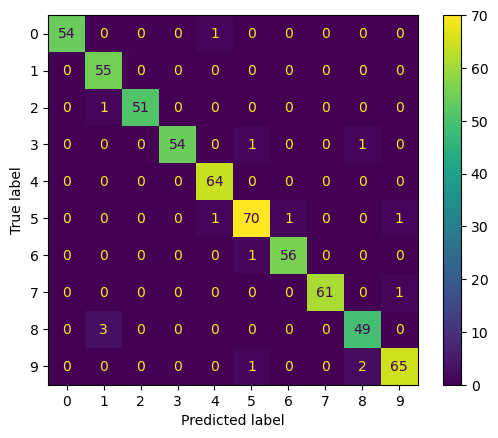

In [ ]:
# ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()